In [53]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/playground-series-s3e2/sample_submission.csv
/kaggle/input/playground-series-s3e2/train.csv
/kaggle/input/playground-series-s3e2/test.csv


In [54]:
data = pd.read_csv('/kaggle/input/playground-series-s3e2/train.csv')

In [55]:
data.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,0,Male,28.0,0,0,Yes,Private,Urban,79.53,31.1,never smoked,0
1,1,Male,33.0,0,0,Yes,Private,Rural,78.44,23.9,formerly smoked,0
2,2,Female,42.0,0,0,Yes,Private,Rural,103.00,40.3,Unknown,0
3,3,Male,56.0,0,0,Yes,Private,Urban,64.87,28.8,never smoked,0
4,4,Female,24.0,0,0,No,Private,Rural,73.36,28.8,never smoked,0


In [56]:
data.shape

(15304, 12)

In [57]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15304 entries, 0 to 15303
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 15304 non-null  int64  
 1   gender             15304 non-null  object 
 2   age                15304 non-null  float64
 3   hypertension       15304 non-null  int64  
 4   heart_disease      15304 non-null  int64  
 5   ever_married       15304 non-null  object 
 6   work_type          15304 non-null  object 
 7   Residence_type     15304 non-null  object 
 8   avg_glucose_level  15304 non-null  float64
 9   bmi                15304 non-null  float64
 10  smoking_status     15304 non-null  object 
 11  stroke             15304 non-null  int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 1.4+ MB


In [58]:
data['gender'].value_counts()

gender
Female    9446
Male      5857
Other        1
Name: count, dtype: int64

In [59]:
data['ever_married'].value_counts()

ever_married
Yes    10385
No      4919
Name: count, dtype: int64

In [60]:
data['work_type'].value_counts()

work_type
Private          9752
children         2038
Self-employed    1939
Govt_job         1533
Never_worked       42
Name: count, dtype: int64

In [61]:
data['Residence_type'].value_counts()

Residence_type
Rural    7664
Urban    7640
Name: count, dtype: int64

In [62]:
data['smoking_status'].value_counts()

smoking_status
never smoked       6281
Unknown            4543
formerly smoked    2337
smokes             2143
Name: count, dtype: int64

In [63]:
data.duplicated().sum()

0

In [64]:
data.groupby('gender')['stroke'].value_counts()*100/15304

gender  stroke
Female  0         59.317825
        1          2.404600
Male    0         36.546001
        1          1.725039
Other   0          0.006534
Name: count, dtype: float64

In [65]:
data.groupby('ever_married')['stroke'].value_counts()*100/15304

ever_married  stroke
No            0         31.874020
              1          0.267904
Yes           0         63.996341
              1          3.861735
Name: count, dtype: float64

In [66]:
data.groupby('work_type')['stroke'].value_counts()*100/15304

work_type      stroke
Govt_job       0          9.566127
               1          0.450863
Never_worked   0          0.274438
Private        0         61.082070
               1          2.639833
Self-employed  0         11.637480
               1          1.032410
children       0         13.310246
               1          0.006534
Name: count, dtype: float64

* From this observation we can say that the percentage of death is in this order 

* lowest
1. Never_worked
1. children
1. Govt_job
1. Self-employed
1. Private
* Highest

* And this observation is quite useful
now we don't have to onehotencode we can just label it by this hierarchy

In [67]:
data.groupby('Residence_type')['stroke'].value_counts()*100/15304

Residence_type  stroke
Rural           0         48.007057
                1          2.071354
Urban           0         47.863304
                1          2.058285
Name: count, dtype: float64

In [68]:
data.groupby('smoking_status')['stroke'].value_counts()*100/15304

smoking_status   stroke
Unknown          0         28.979352
                 1          0.705698
formerly smoked  0         14.231573
                 1          1.038944
never smoked     0         39.362258
                 1          1.679300
smokes           0         13.297177
                 1          0.705698
Name: count, dtype: float64

# Preprocessing

In [69]:
data.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,0,Male,28.0,0,0,Yes,Private,Urban,79.53,31.1,never smoked,0
1,1,Male,33.0,0,0,Yes,Private,Rural,78.44,23.9,formerly smoked,0
2,2,Female,42.0,0,0,Yes,Private,Rural,103.00,40.3,Unknown,0
3,3,Male,56.0,0,0,Yes,Private,Urban,64.87,28.8,never smoked,0
4,4,Female,24.0,0,0,No,Private,Rural,73.36,28.8,never smoked,0


In [70]:
data.drop(columns=['id'],inplace=True)

In [71]:
data[data['gender'] == 'Other']

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
9363,Other,9.0,0,0,No,children,Rural,96.04,18.0,Unknown,0


In [72]:
# data = data[data['gender'] != 'Other']
data.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,28.0,0,0,Yes,Private,Urban,79.53,31.1,never smoked,0
1,Male,33.0,0,0,Yes,Private,Rural,78.44,23.9,formerly smoked,0
2,Female,42.0,0,0,Yes,Private,Rural,103.00,40.3,Unknown,0
3,Male,56.0,0,0,Yes,Private,Urban,64.87,28.8,never smoked,0
4,Female,24.0,0,0,No,Private,Rural,73.36,28.8,never smoked,0


In [73]:
data = pd.get_dummies(data,columns=['gender','ever_married','Residence_type','smoking_status'],drop_first=True,dtype=int)
data.head()

,age,hypertension,heart_disease,work_type,avg_glucose_level,bmi,stroke,gender_Male,gender_Other,ever_married_Yes,Residence_type_Urban,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes
0,28.0,0,0,Private,79.53,31.1,0,1,0,1,1,0,1,0
1,33.0,0,0,Private,78.44,23.9,0,1,0,1,0,1,0,0
2,42.0,0,0,Private,103.00,40.3,0,0,0,1,0,0,0,0
3,56.0,0,0,Private,64.87,28.8,0,1,0,1,1,0,1,0
4,24.0,0,0,Private,73.36,28.8,0,0,0,0,0,0,1,0


In [74]:
data['work_type'] = data['work_type'].replace(['Never_worked', 'children', 'Govt_job', 'Self-employed', 'Private'], [0, 1, 2, 3, 4])

In [75]:
data.head()

,age,hypertension,heart_disease,work_type,avg_glucose_level,bmi,stroke,gender_Male,gender_Other,ever_married_Yes,Residence_type_Urban,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes
0,28.0,0,0,4,79.53,31.1,0,1,0,1,1,0,1,0
1,33.0,0,0,4,78.44,23.9,0,1,0,1,0,1,0,0
2,42.0,0,0,4,103.00,40.3,0,0,0,1,0,0,0,0
3,56.0,0,0,4,64.87,28.8,0,1,0,1,1,0,1,0
4,24.0,0,0,4,73.36,28.8,0,0,0,0,0,0,1,0


In [76]:
X = data.drop(columns=['stroke'])
y = data['stroke']

In [77]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, random_state=100)

In [78]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(12243, 13)
(3061, 13)
(12243,)
(3061,)


In [79]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.fit_transform(X_test)

In [80]:
import tensorflow
import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense

In [81]:
model = Sequential()
model.add(Dense(16,activation='relu',input_dim = 13))
model.add(Dense(32,activation='relu'))
model.add(Dense(32,activation='relu'))
model.add(Dense(64,activation='relu'))
model.add(Dense(64,activation='relu'))
model.add(Dense(128,activation='relu'))
model.add(Dense(128,activation='relu'))
model.add(Dense(128,activation='relu'))
model.add(Dense(64,activation='relu'))
model.add(Dense(64,activation='relu'))
model.add(Dense(32,activation='relu'))
model.add(Dense(32,activation='relu'))
model.add(Dense(16,activation='relu'))
model.add(Dense(16,activation='relu'))
model.add(Dense(8,activation='relu'))
model.add(Dense(8,activation='relu'))
model.add(Dense(4,activation='relu'))
model.add(Dense(4,activation='relu'))
model.add(Dense(2,activation='relu'))
model.add(Dense(2,activation='relu'))
model.add(Dense(1,activation='sigmoid'))
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_21 (Dense)            (None, 16)                224       
                                                                 
 dense_22 (Dense)            (None, 32)                544       
                                                                 
 dense_23 (Dense)            (None, 32)                1056      
                                                                 
 dense_24 (Dense)            (None, 64)                2112      
                                                                 
 dense_25 (Dense)            (None, 64)                4160      
                                                                 
 dense_26 (Dense)            (None, 128)               8320      
                                                                 
 dense_27 (Dense)            (None, 128)              

In [82]:
model.compile(loss='binary_crossentropy', optimizer='Adam',metrics=['accuracy'])

In [83]:
history = model.fit(X_train_scaled, y_train, epochs=100,validation_split=0.2)

Epoch 1/100
307/307 [==============================] - 6s 5ms/step - loss: 0.5838 - accuracy: 0.9554 - val_loss: 0.4653 - val_accuracy: 0.9641
Epoch 2/100
307/307 [==============================] - 1s 4ms/step - loss: 0.3724 - accuracy: 0.9584 - val_loss: 0.2851 - val_accuracy: 0.9641
Epoch 3/100
307/307 [==============================] - 1s 4ms/step - loss: 0.2473 - accuracy: 0.9584 - val_loss: 0.2023 - val_accuracy: 0.9641
Epoch 4/100
307/307 [==============================] - 1s 4ms/step - loss: 0.1967 - accuracy: 0.9584 - val_loss: 0.1714 - val_accuracy: 0.9641
Epoch 5/100
307/307 [==============================] - 1s 4ms/step - loss: 0.1799 - accuracy: 0.9584 - val_loss: 0.1609 - val_accuracy: 0.9641
Epoch 6/100
307/307 [==============================] - 1s 4ms/step - loss: 0.1747 - accuracy: 0.9584 - val_loss: 0.1571 - val_accuracy: 0.9641
Epoch 7/100
307/307 [==============================] - 1s 4ms/step - loss: 0.1733 - accuracy: 0.9584 - val_loss: 0.1559 - val_accuracy: 0.9641

In [84]:
y_log = model.predict(X_test_scaled)

96/96 [==============================] - 0s 2ms/step


In [85]:
y_pred = np.where(y_log>0.5,1,0)

In [86]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)

0.9552433845148645

In [87]:
import matplotlib.pyplot as plt

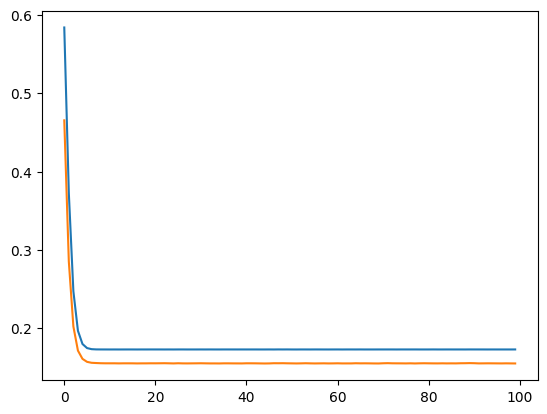

In [88]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

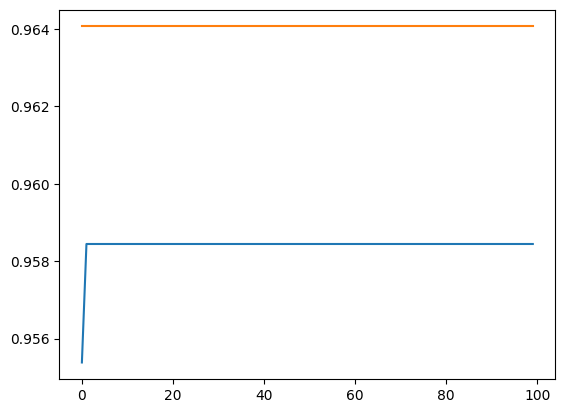

In [89]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])

In [90]:
import pickle
pickle.dump(model, open('Final.pkl','wb'))

In [91]:
sample = pd.read_csv('/kaggle/input/playground-series-s3e2/sample_submission.csv')
sample

,id,stroke
0,15304,0.041296
1,15305,0.041296
2,15306,0.041296
3,15307,0.041296
4,15308,0.041296
...,...,...
10199,25503,0.041296
10200,25504,0.041296
10201,25505,0.041296
10202,25506,0.041296


In [92]:
test = pd.read_csv('/kaggle/input/playground-series-s3e2/test.csv')
test.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status
0,15304,Female,57.0,0,0,Yes,Private,Rural,82.54,33.4,Unknown
1,15305,Male,70.0,1,0,Yes,Private,Urban,72.06,28.5,Unknown
2,15306,Female,5.0,0,0,No,children,Urban,103.72,19.5,Unknown
3,15307,Female,56.0,0,0,Yes,Govt_job,Urban,69.24,41.4,smokes
4,15308,Male,32.0,0,0,Yes,Private,Rural,111.15,30.1,smokes


In [93]:
test.shape

(10204, 11)

In [94]:
test_id = test['id']

In [95]:
# test[test['gender']=='Other']

In [96]:
test.isnull().sum()

id                   0
gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
dtype: int64

In [97]:
test.drop(columns=['id'],inplace=True)
test.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status
0,Female,57.0,0,0,Yes,Private,Rural,82.54,33.4,Unknown
1,Male,70.0,1,0,Yes,Private,Urban,72.06,28.5,Unknown
2,Female,5.0,0,0,No,children,Urban,103.72,19.5,Unknown
3,Female,56.0,0,0,Yes,Govt_job,Urban,69.24,41.4,smokes
4,Male,32.0,0,0,Yes,Private,Rural,111.15,30.1,smokes


In [98]:
test = pd.get_dummies(test,columns=['gender','ever_married','Residence_type','smoking_status'],drop_first=True,dtype=int)
test.head()

,age,hypertension,heart_disease,work_type,avg_glucose_level,bmi,gender_Male,gender_Other,ever_married_Yes,Residence_type_Urban,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes
0,57.0,0,0,Private,82.54,33.4,0,0,1,0,0,0,0
1,70.0,1,0,Private,72.06,28.5,1,0,1,1,0,0,0
2,5.0,0,0,children,103.72,19.5,0,0,0,1,0,0,0
3,56.0,0,0,Govt_job,69.24,41.4,0,0,1,1,0,0,1
4,32.0,0,0,Private,111.15,30.1,1,0,1,0,0,0,1


In [99]:
test['work_type'] = test['work_type'].replace(['Never_worked', 'children', 'Govt_job', 'Self-employed', 'Private'], [0, 1, 2, 3, 4])
test.head()

,age,hypertension,heart_disease,work_type,avg_glucose_level,bmi,gender_Male,gender_Other,ever_married_Yes,Residence_type_Urban,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes
0,57.0,0,0,4,82.54,33.4,0,0,1,0,0,0,0
1,70.0,1,0,4,72.06,28.5,1,0,1,1,0,0,0
2,5.0,0,0,1,103.72,19.5,0,0,0,1,0,0,0
3,56.0,0,0,2,69.24,41.4,0,0,1,1,0,0,1
4,32.0,0,0,4,111.15,30.1,1,0,1,0,0,0,1


In [100]:
test_scaled = scaler.fit_transform(test)

In [101]:
s_pred = model.predict(test_scaled)
s_pred = np.ravel(s_pred)

319/319 [==============================] - 1s 2ms/step


In [102]:
stroke = pd.Series(s_pred)
stroke

0        0.040331
1        0.040331
2        0.040331
3        0.040331
4        0.040331
           ...   
10199    0.040331
10200    0.040331
10201    0.040331
10202    0.040331
10203    0.040331
Length: 10204, dtype: float32

In [103]:
data = {"id": test_id, "stroke": stroke}
df = pd.concat(data, axis = 1)
df

,id,stroke
0,15304,0.040331
1,15305,0.040331
2,15306,0.040331
3,15307,0.040331
4,15308,0.040331
...,...,...
10199,25503,0.040331
10200,25504,0.040331
10201,25505,0.040331
10202,25506,0.040331


In [104]:
df.to_csv('answer.csv', index=False)